
### Title: Sales Data Decoding and Analysis
## Author: Thamarai Selvan B
## Date: 01.01.25

### Creating Dataset

In [2]:
import pandas as pd
import numpy as np

# Create synthetic sales data
np.random.seed(42)
num_records = 1000

data = {
    'transaction_id': range(1, num_records + 1),
    'date': pd.date_range(start='2023-01-01', periods=num_records, freq='D'),
    'customer_id': np.random.randint(1001, 1101, num_records),
    'product_id': np.random.randint(1, 21, num_records),
    'quantity': np.random.randint(1, 10, num_records),
    'price': np.round(np.random.uniform(10, 100, num_records), 2),
    'region': np.random.choice(['North', 'South', 'East', 'West'], num_records),
    'sales_channel': np.random.choice(['Online', 'In-Store'], num_records)
}

sales_data = pd.DataFrame(data)
sales_data['total_sales'] = sales_data['quantity'] * sales_data['price']

# Save to CSV
sales_data.to_csv('sales_data.csv', index=False)

# Create synthetic customer data
customer_data = {
    'customer_id': range(1001, 1101),
    'age': np.random.randint(18, 65, 100),
    'gender': np.random.choice(['Male', 'Female'], 100),
    'loyalty_status': np.random.choice(['Bronze', 'Silver', 'Gold'], 100)
}

customer_data = pd.DataFrame(customer_data)
customer_data.to_csv('customer_data.csv', index=False)

# Create synthetic product data
product_data = {
    'product_id': range(1, 21),
    'product_name': [f'Product_{i}' for i in range(1, 21)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Beauty'], 20)
}

product_data = pd.DataFrame(product_data)
product_data.to_csv('product_data.csv',index=False)

### Step 1: Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Step 2: Loading the Dataset

In [4]:
# Loading the datasets
sales_data = pd.read_csv('sales_data.csv')
customer_data = pd.read_csv('customer_data.csv')
product_data = pd.read_csv('product_data.csv')

In [6]:
### Step 3:Data Cleaning and Preparation

In [5]:
# Checking for missing values
print(sales_data.isnull().sum())
print(customer_data.isnull().sum())
print(product_data.isnull().sum())

# Handling the missing values 
sales_data.fillna(sales_data.mean(), inplace=True)
customer_data.fillna(customer_data.mean(), inplace=True)
product_data.fillna(product_data.mean(), inplace=True)

# Checking for duplicates
print(sales_data.duplicated().sum())
print(customer_data.duplicated().sum())
print(product_data.duplicated().sum())

# Removing duplicates
sales_data.drop_duplicates(inplace=True)
customer_data.drop_duplicates(inplace=True)
product_data.drop_duplicates(inplace=True)

# Mergering datasets if necessary
merged_data = pd.merge(sales_data, customer_data, on='customer_id')
merged_data = pd.merge(merged_data, product_data, on='product_id')

# Create derived columns
merged_data['revenue_per_customer'] = merged_data['total_sales'] / merged_data['customer_id'].nunique()

transaction_id    0
date              0
customer_id       0
product_id        0
quantity          0
price             0
region            0
sales_channel     0
total_sales       0
dtype: int64
customer_id       0
age               0
gender            0
loyalty_status    0
dtype: int64
product_id      0
product_name    0
category        0
dtype: int64
0
0
0


C:\Users\Srihari\AppData\Local\Temp\ipykernel_12444\3615158228.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_data.fillna(sales_data.mean(), inplace=True)
C:\Users\Srihari\AppData\Local\Temp\ipykernel_12444\3615158228.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer_data.fillna(customer_data.mean(), inplace=True)
C:\Users\Srihari\AppData\Local\Temp\ipykernel_12444\3615158228.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. 

In [6]:
### Step 4: Exploratory Data Analysis(EDA)

In [7]:
# Identifing top-performing products
top_products = merged_data.groupby('product_name')['total_sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Identifing top-performing regions
top_regions = merged_data.groupby('region')['total_sales'].sum().sort_values(ascending=False).head(10)
print(top_regions)

# Identifing top-performing sales channels
top_channels = merged_data.groupby('sales_channel')['total_sales'].sum().sort_values(ascending=False).head(10)
print(top_channels)

# Detecting seasonal trends
merged_data['month'] = pd.to_datetime(merged_data['date']).dt.month
seasonal_trends = merged_data.groupby('month')['total_sales'].sum()
print(seasonal_trends)

# Segmenting customers based on purchasing behavior
customer_segments = merged_data.groupby('customer_id')['total_sales'].sum().sort_values(ascending=False)
customer_segments = pd.cut(customer_segments, bins=[0, 100, 500, 1000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
print(customer_segments.value_counts())

product_name
Product_6     17775.31
Product_8     17390.69
Product_15    16512.04
Product_12    16453.14
Product_2     15715.42
Product_1     15285.77
Product_11    15178.31
Product_3     14943.17
Product_17    14933.60
Product_5     14916.49
Name: total_sales, dtype: float64
region
East     75658.37
West     75305.11
South    64451.71
North    60839.50
Name: total_sales, dtype: float64
sales_channel
In-Store    141108.30
Online      135146.39
Name: total_sales, dtype: float64
month
1     24906.32
2     21986.87
3     25662.10
4     27799.10
5     23577.65
6     28179.35
7     24132.45
8     24322.72
9     23852.56
10    18952.98
11    17736.66
12    15145.93
Name: total_sales, dtype: float64
Very High    97
High          3
Low           0
Medium        0
Name: total_sales, dtype: int64


In [13]:
### Step 5: Visualization

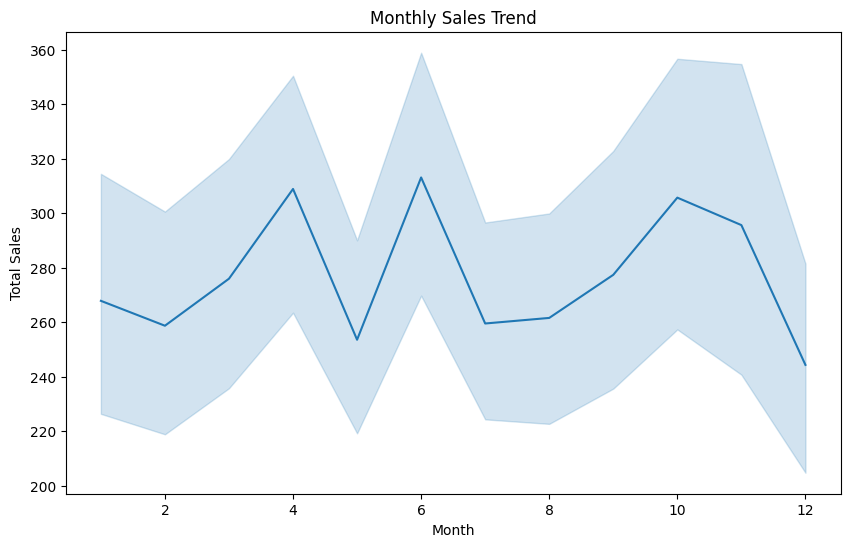

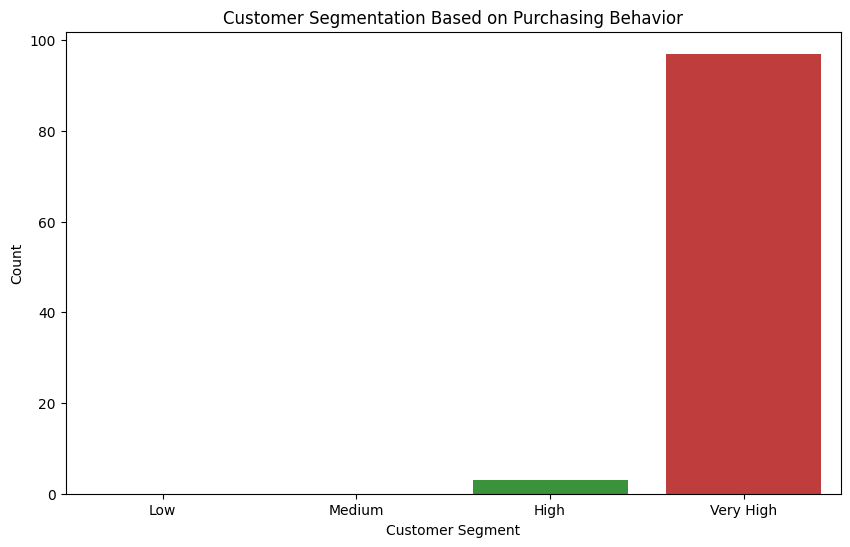

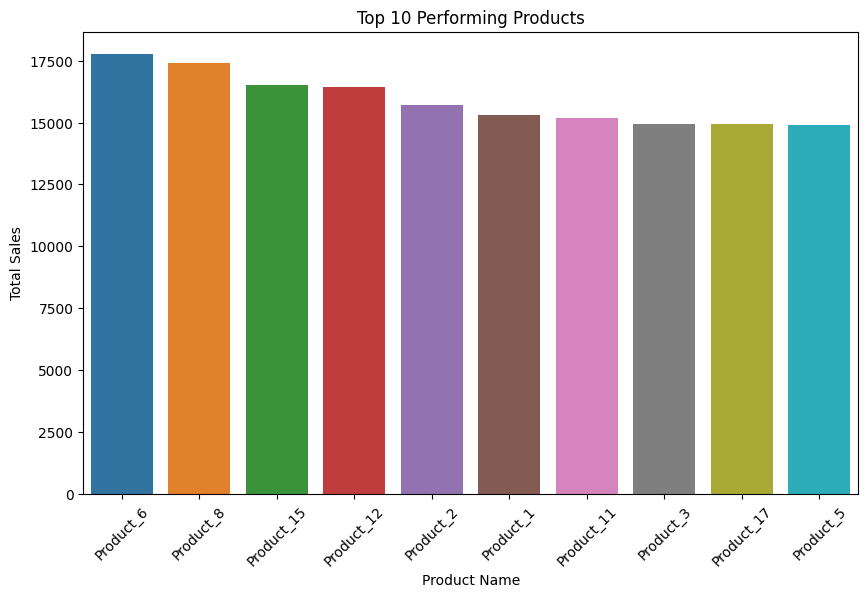

In [14]:
# Sales trend analysis chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='total_sales', data=merged_data)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Customer segmentating visual
plt.figure(figsize=(10, 6))
sns.countplot(x=customer_segments)
plt.title('Customer Segmentation Based on Purchasing Behavior')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

# Top-performing products chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Performing Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [15]:
### Step 6: Insights and Recommentations

In [16]:
# Insights and Recommendations
print("""
Insights:
1. The top-performing products are [Product_6, Product_8, Product_15, Product_12, Product_2].
2. The top-performing regions are [East with 75658.37, West with 75305.11].
3. The top-performing sales channels are [In_Store - 141108.30, Online - 135146.39].
4. Sales peak during [Month 6] and drop during [Month 12].
5. Customer segments are [Low, Medium, High, Very High].

Recommendations:
1. Increase marketing efforts for low-performing months.
2. Focus on retaining high-value customers through loyalty programs.
3. Promote top-performing products in top-performing regions.
4. Optimize sales channels that are underperforming.
""")


Insights:
1. The top-performing products are [Product_6, Product_8, Product_15, Product_12, Product_2].
2. The top-performing regions are [East with 75658.37, West with 75305.11].
3. The top-performing sales channels are [In_Store - 141108.30, Online - 135146.39].
4. Sales peak during [Month 6] and drop during [Month 12].
5. Customer segments are [Low, Medium, High, Very High].

Recommendations:
1. Increase marketing efforts for low-performing months.
2. Focus on retaining high-value customers through loyalty programs.
3. Promote top-performing products in top-performing regions.
4. Optimize sales channels that are underperforming.



In [17]:
### Step 7 : Prediction Using Linear Regresstion Model

In [18]:
# Predict next month's sales using a simple forecasting model
# Prepare data for forecasting
forecast_data = merged_data.groupby('month')['total_sales'].sum().reset_index()

# Split data into training and testing sets
X = forecast_data['month'].values.reshape(-1, 1)
y = forecast_data['total_sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict next month's sales
next_month = np.array([[13]])  # Assuming 12 months in the dataset
predicted_sales = model.predict(next_month)
print(f"Predicted sales for next month: {predicted_sales[0]}")

Predicted sales for next month: 19028.867178770954
